In [857]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [879]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

    

In [880]:
df = read_data()

In [881]:
model = sort_important_features(df)

feature: posemo_2q, importance: 0.07860387941500216
feature: money, importance: 0.0629093446037561
feature: negemo_change_q, importance: 0.057406679082462816
feature: focuspresent, importance: 0.04138671958678237
feature: i, importance: 0.04045481949111495
feature: anger_1h, importance: 0.03081285903904367
feature: anger_1q, importance: 0.030555384691335848
feature: certain, importance: 0.026989729126099978
feature: risk, importance: 0.02311409813376684
feature: ipron, importance: 0.023102864120231253
feature: relig, importance: 0.022339359387037065
feature: affect_change_h, importance: 0.02229880367334322
feature: posemo_change_h, importance: 0.021476327920091094
feature: focusfuture, importance: 0.01982039724635476
feature: negate, importance: 0.01973723479509359
feature: cause, importance: 0.017993111024134166
feature: discrep, importance: 0.01731402913082351
feature: leisure, importance: 0.014090483298103683
feature: article, importance: 0.01340900666684759
feature: number, importa

In [873]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [874]:
print_tree(model)

In [832]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [833]:
rf, importances, names = sort_important_features(df)

feature: money, importance: 0.05535163839593421
feature: focuspresent, importance: 0.031533076389311916
feature: tentat, importance: 0.02747076928827965
feature: certain, importance: 0.02642730412291258
feature: i, importance: 0.02588776784652862
feature: Authority, importance: 0.02540991760947662
feature: risk, importance: 0.025374964277166012
feature: posemo_2q, importance: 0.020346401159232964
feature: insight, importance: 0.019818681574016894
feature: ipron, importance: 0.01952092287681815
feature: home, importance: 0.019312370753789884
feature: auxverb, importance: 0.018517570231077994
feature: Moral, importance: 0.018090521843043803
feature: social, importance: 0.01663277547888942
feature: conj, importance: 0.015509299933131488
feature: AuthorityVice, importance: 0.015435591235540549
feature: negate, importance: 0.014920150652126762
feature: negemo_1q, importance: 0.014543693972264515
feature: posemo_change_h, importance: 0.013696596349654162
feature: drives, importance: 0.012336

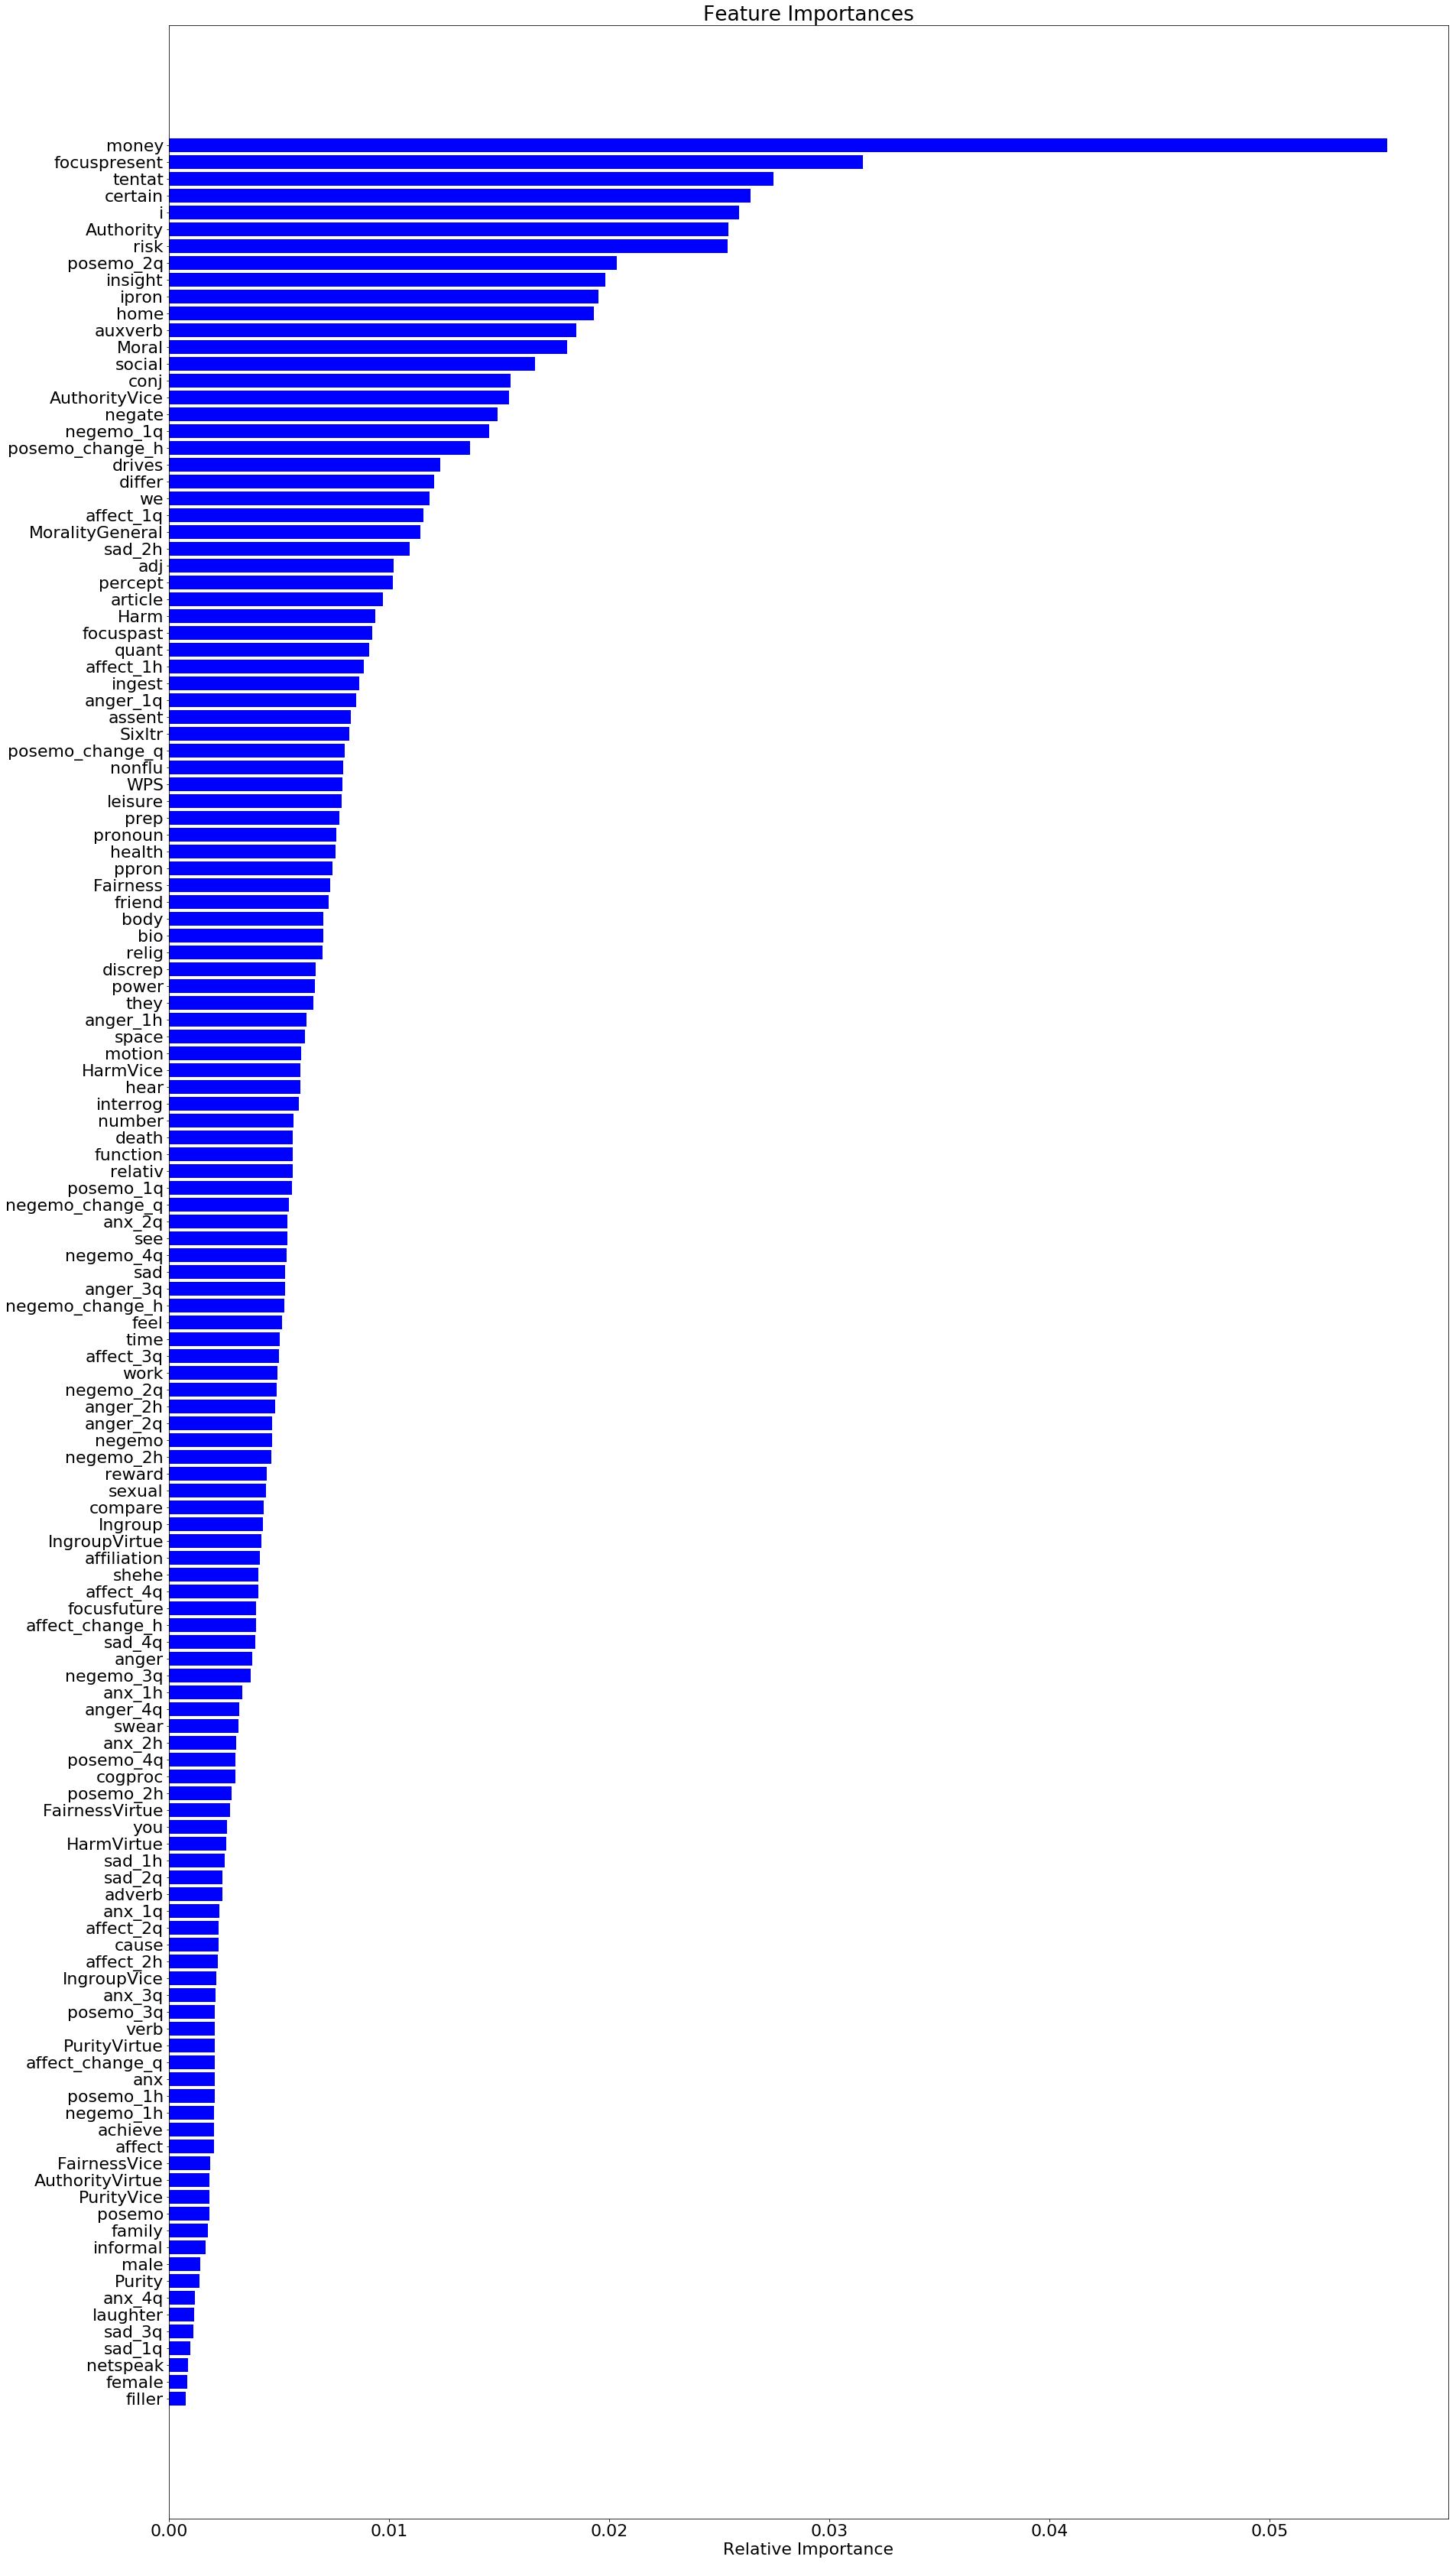

In [834]:
plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [156]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df



In [900]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['i', 'negate','anx_1q','posemo_2q','interrog','negemo','risk', 'see', 'money', 'Moral', 'focuspresent', 'quant']
    lr.fit(df[predictors], df['norm_persuasive'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_persuasive'], X2)
    est2 = est.fit()
    print(est2.summary())

In [901]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:        norm_persuasive   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     38.08
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           3.42e-82
Time:                        20:04:22   Log-Likelihood:                -15523.
No. Observations:                2406   AIC:                         3.107e+04
Df Residuals:                    2393   BIC:                         3.115e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -72.9167     22.698     -3.212   